In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

sns.set_theme(style="whitegrid")

df = pd.read_csv("ultimate_college_championship.csv")
df.head()


,player,level,gender,division,team_name,Turns,Ds,Assists,Points,plus_minus,team_games,turns_per_game,ds_per_game,ast_per_game,pts_per_game,pls_mns_per_game
0,Jacques Nissen,Division 1,Men,Division 1 Men,Brown Brownian Motion,12,8,38,13,47,8,1.500000,1.000000,4.750000,1.625000,5.875
1,Cal Nightingale,Division 1,Men,Division 1 Men,Brown Brownian Motion,3,0,12,27,36,8,0.375000,0.000000,1.500000,3.375000,4.500
2,Faye Burdick,Division 1,Women,Division 1 Women,Colorado Quandary,6,12,16,13,35,7,0.857143,1.714286,2.285714,1.857143,5.000
3,Matthew Gregor,Division 3,Men,Division 3 Men,Franciscan Fatal,2,6,3,26,33,6,0.333333,1.000000,0.500000,4.333333,5.500
4,Frankie Saraniti,Division 3,Women,Division 3 Women,Carleton Eclipse,11,15,12,17,33,6,1.833333,2.500000,2.000000,2.833333,5.500


## Sanity check and data cleaning 

In [2]:
print("Shape:", df.shape)
df.columns


Shape: (1665, 16)


Index(['player', 'level', 'gender', 'division', 'team_name', 'Turns', 'Ds',
       'Assists', 'Points', 'plus_minus', 'team_games', 'turns_per_game',
       'ds_per_game', 'ast_per_game', 'pts_per_game', 'pls_mns_per_game'],
      dtype='object')

In [3]:
df.dtypes

player               object
level                object
gender               object
division             object
team_name            object
Turns                 int64
Ds                    int64
Assists               int64
Points                int64
plus_minus            int64
team_games            int64
turns_per_game      float64
ds_per_game         float64
ast_per_game        float64
pts_per_game        float64
pls_mns_per_game    float64
dtype: object

In [4]:
df.isna().mean().sort_values(ascending=False)

player              0.0
level               0.0
gender              0.0
division            0.0
team_name           0.0
Turns               0.0
Ds                  0.0
Assists             0.0
Points              0.0
plus_minus          0.0
team_games          0.0
turns_per_game      0.0
ds_per_game         0.0
ast_per_game        0.0
pts_per_game        0.0
pls_mns_per_game    0.0
dtype: float64

In [5]:
num_cols = ["Turns","Ds","Assists","Points","plus_minus","team_games",
            "turns_per_game","ds_per_game","ast_per_game","pts_per_game","pls_mns_per_game"]
df[num_cols].describe()


,Turns,Ds,Assists,Points,plus_minus,team_games,turns_per_game,ds_per_game,ast_per_game,pts_per_game,pls_mns_per_game
count,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000
mean,5.210210,2.015616,2.863063,2.872072,2.540541,5.634835,0.922888,0.354274,0.505023,0.506639,0.443049
std,8.340069,2.972995,5.084548,3.855702,7.362094,0.684644,1.455542,0.514528,0.880858,0.670578,1.273372
min,0.000000,0.000000,0.000000,0.000000,-53.000000,5.000000,0.000000,0.000000,0.000000,0.000000,-8.833333
25%,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,1.000000,1.000000,1.000000,6.000000,0.400000,0.200000,0.166667,0.200000,0.200000
75%,7.000000,3.000000,3.000000,4.000000,5.000000,6.000000,1.166667,0.500000,0.600000,0.714286,0.833333
max,89.000000,43.000000,43.000000,27.000000,47.000000,8.000000,14.833333,7.166667,7.600000,4.400000,5.875000


In [6]:
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

df[num_cols].dtypes

Turns                 int64
Ds                    int64
Assists               int64
Points                int64
plus_minus            int64
team_games            int64
turns_per_game      float64
ds_per_game         float64
ast_per_game        float64
pts_per_game        float64
pls_mns_per_game    float64
dtype: object

In [7]:
df["offense_per_game"] = df["ast_per_game"] + df["pts_per_game"]
df["d_to_turn_ratio"] = df["ds_per_game"] / (df["turns_per_game"] + 1e-9)

df[["offense_per_game","d_to_turn_ratio"]].head()

,offense_per_game,d_to_turn_ratio
0,6.375000,0.666667
1,4.875000,0.000000
2,4.142857,2.000000
3,4.833333,3.000000
4,4.833333,1.363636


## EDA

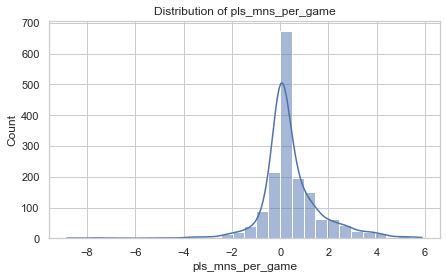

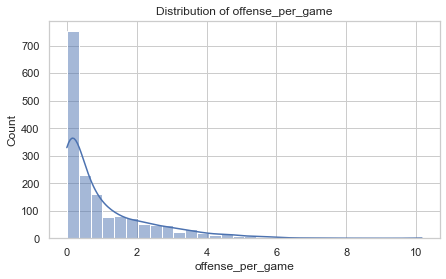

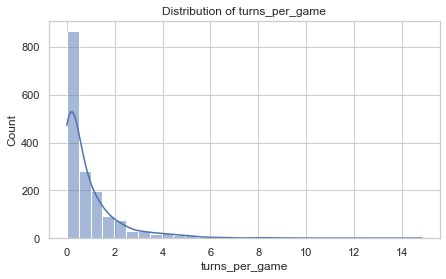

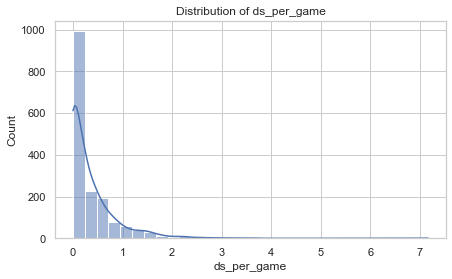

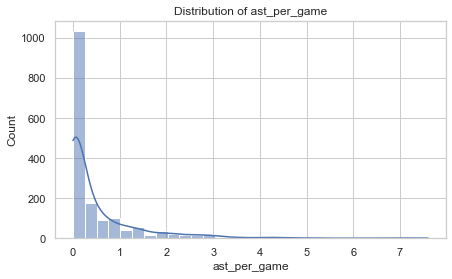

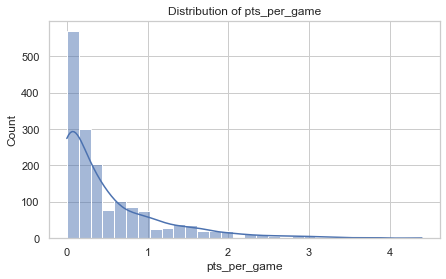

In [8]:
key_metrics = ["pls_mns_per_game","offense_per_game","turns_per_game","ds_per_game","ast_per_game","pts_per_game"]

for col in key_metrics:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


## EDA continued: Heatmap and scatter

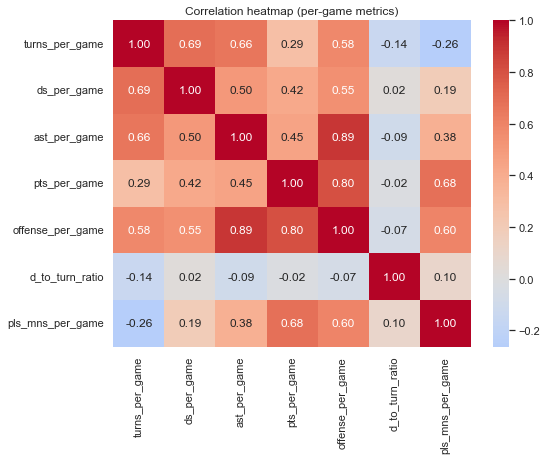

In [9]:
corr_cols = ["turns_per_game","ds_per_game","ast_per_game","pts_per_game",
             "offense_per_game","d_to_turn_ratio","pls_mns_per_game"]

corr = df[corr_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation heatmap (per-game metrics)")
plt.show()


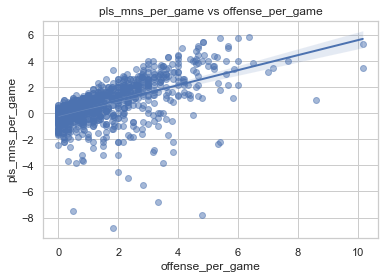

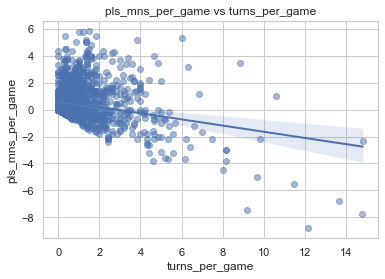

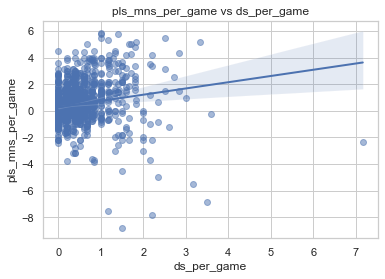

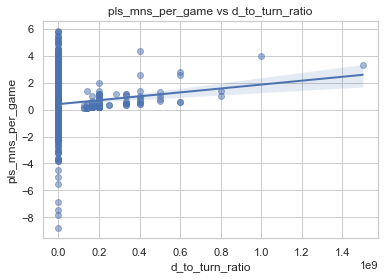

In [10]:
pairs = [
    ("offense_per_game", "pls_mns_per_game"),
    ("turns_per_game", "pls_mns_per_game"),
    ("ds_per_game", "pls_mns_per_game"),
    ("d_to_turn_ratio", "pls_mns_per_game")
]

for x, y in pairs:
    plt.figure(figsize=(6,4))
    sns.regplot(data=df, x=x, y=y, scatter_kws={"alpha":0.5}, line_kws={"linewidth":2})
    plt.title(f"{y} vs {x}")
    plt.show()


In [11]:
metrics = ["pls_mns_per_game","offense_per_game","turns_per_game","ds_per_game"]

df.groupby("gender")[metrics].agg(["count","mean","median"]).round(3)


pls_mns_per_game               offense_per_game                \
                  count   mean median            count   mean median   
gender                                                                 
Men                 893  0.683  0.286              893  1.003  0.400   
Women               772  0.165  0.000              772  1.022  0.586   

       turns_per_game               ds_per_game                
                count   mean median       count   mean median  
gender                                                         
Men               893  0.559  0.200         893  0.240  0.167  
Women             772  1.343  0.667         772  0.487  0.200

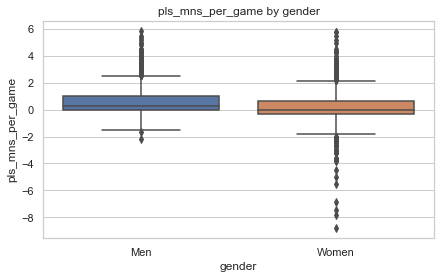

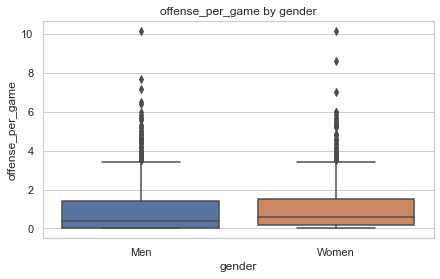

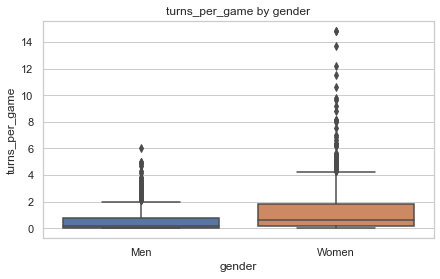

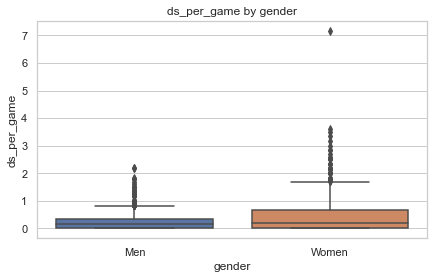

In [12]:
for col in ["pls_mns_per_game","offense_per_game","turns_per_game","ds_per_game"]:
    plt.figure(figsize=(7,4))
    sns.boxplot(data=df, x="gender", y=col)
    plt.title(f"{col} by gender")
    plt.show()


In [13]:
df.groupby("level")[metrics].mean().round(3)


,pls_mns_per_game,offense_per_game,turns_per_game,ds_per_game
level,,,,
Division 1,0.548,0.994,0.734,0.288
Division 3,0.296,1.037,1.188,0.448


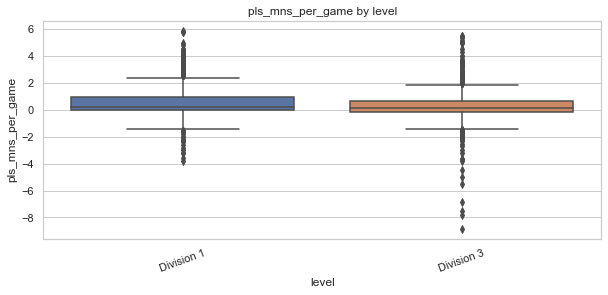

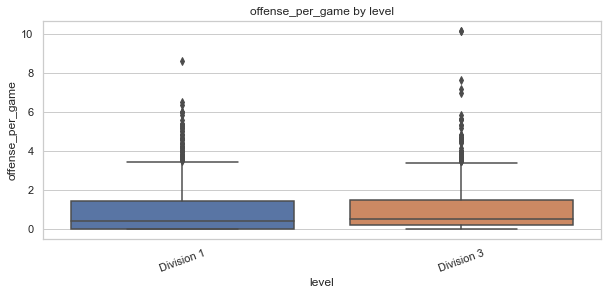

In [14]:
for col in ["pls_mns_per_game","offense_per_game"]:
    plt.figure(figsize=(10,4))
    sns.boxplot(data=df, x="level", y=col)
    plt.title(f"{col} by level")
    plt.xticks(rotation=20)
    plt.show()


In [15]:
df.groupby("division")[metrics].mean().round(3)


,pls_mns_per_game,offense_per_game,turns_per_game,ds_per_game
division,,,,
Division 1 Men,0.716,0.976,0.468,0.208
Division 1 Women,0.353,1.015,1.041,0.379
Division 3 Men,0.636,1.040,0.688,0.284
Division 3 Women,-0.100,1.033,1.771,0.638


## top players rank 

In [16]:
min_games = 5
df_qual = df[df["team_games"] >= min_games].copy()

def top_n(metric, n=15):
    return df_qual.sort_values(metric, ascending=False)[
        ["player","team_name","gender","level","division","team_games", metric]
    ].head(n)

top_n("pls_mns_per_game", 15)


,player,team_name,gender,level,division,team_games,pls_mns_per_game
0,Jacques Nissen,Brown Brownian Motion,Men,Division 1,Division 1 Men,8,5.875000
12,Emily Kemp,Tufts EWO,Women,Division 1,Division 1 Women,5,5.800000
13,Devin Quinn,California - Santa Barbara Burning Skirts,Women,Division 1,Division 1 Women,5,5.800000
3,Matthew Gregor,Franciscan Fatal,Men,Division 3,Division 3 Men,6,5.500000
4,Frankie Saraniti,Carleton Eclipse,Women,Division 3,Division 3 Women,6,5.500000
5,Jacob Felton,Davenport Panthers,Men,Division 3,Division 3 Men,6,5.333333
6,Rowan Dong,Carleton Eclipse,Women,Division 3,Division 3 Women,6,5.166667
8,Charles Tantum,Williams WUFO,Men,Division 3,Division 3 Men,6,5.166667
2,Faye Burdick,Colorado Quandary,Women,Division 1,Division 1 Women,7,5.000000
9,Will Brandt,St Olaf Berzerkers,Men,Division 3,Division 3 Men,6,5.000000


In [17]:
top_n("offense_per_game", 15)


,player,team_name,gender,level,division,team_games,offense_per_game
40,Julianna Galian,Portland UPRoar,Women,Division 3,Division 3 Women,6,10.166667
5,Jacob Felton,Davenport Panthers,Men,Division 3,Division 3 Men,6,10.166667
396,Jolie Krebs,SUNY - Binghamton Big Bear,Women,Division 1,Division 1 Women,5,8.600000
24,Daniel Snider,Bates Orange Whip,Men,Division 3,Division 3 Men,6,7.666667
43,Danny Klein,Williams WUFO,Men,Division 3,Division 3 Men,6,7.166667
55,Zoe Costanza,Haverford/Bryn Mawr Sneetches,Women,Division 3,Division 3 Women,6,7.000000
7,Leo Gordon,Brown Brownian Motion,Men,Division 1,Division 1 Men,8,6.500000
0,Jacques Nissen,Brown Brownian Motion,Men,Division 1,Division 1 Men,8,6.375000
178,Katrina McGuire,Michigan Flywheel,Women,Division 1,Division 1 Women,5,6.000000
13,Devin Quinn,California - Santa Barbara Burning Skirts,Women,Division 1,Division 1 Women,5,6.000000


## team overview 

In [18]:
team_total_pm = df.groupby("team_name")["plus_minus"].sum().sort_values(ascending=False)

team_total_pm.head(15)


team_name
Brown Brownian Motion      176
Colorado Mambird           170
Cal Poly-SLO Slocore       158
St Olaf Berzerkers         152
Williams WUFO              146
Colorado Quandary          145
Oregon EGO                 143
North Carolina Darkside    138
Middlebury Pranksters      133
North Carolina Pleiades    120
Minnesota Grey Duck        118
Georgia Jojah              116
Pittsburgh En Sabah Nur    112
Lewis & Clark Bacchus      110
Massachusetts Zoodisc      107
Name: plus_minus, dtype: int64

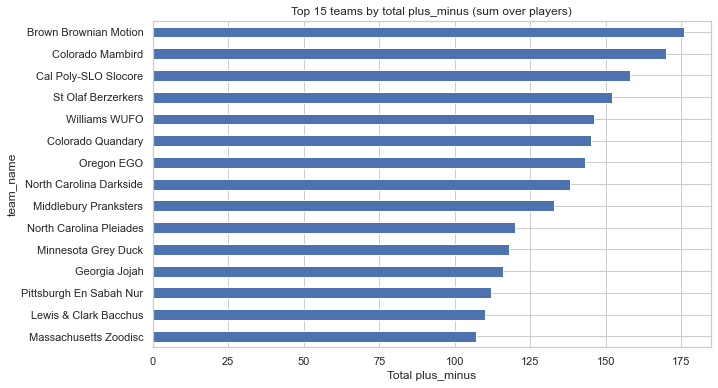

In [19]:
plt.figure(figsize=(10,6))
team_total_pm.head(15).sort_values().plot(kind="barh")
plt.title("Top 15 teams by total plus_minus (sum over players)")
plt.xlabel("Total plus_minus")
plt.show()


## Clustering

Instead of predicting player impact directly, we explore whether players naturally form distinct archetypes based on their per-game statistics.

Clustering allows us to identify common player roles (e.g., offensive contributors, defensive specialists, high-risk handlers) without imposing any predefined labels.

In [20]:
# high_impact player
threshold = df["plus_minus"].quantile(0.75)
df["high_impact"] = (df["plus_minus"] >= threshold).astype(int)
features = ["turns_per_game", "ds_per_game", "ast_per_game", "pts_per_game", "team_games"]


In [21]:
df[df['high_impact']==1]

,player,level,gender,division,team_name,Turns,Ds,Assists,Points,plus_minus,team_games,turns_per_game,ds_per_game,ast_per_game,pts_per_game,pls_mns_per_game,offense_per_game,d_to_turn_ratio,high_impact
0,Jacques Nissen,Division 1,Men,Division 1 Men,Brown Brownian Motion,12,8,38,13,47,8,1.500000,1.000000,4.750000,1.625000,5.875000,6.375000,6.666667e-01,1
1,Cal Nightingale,Division 1,Men,Division 1 Men,Brown Brownian Motion,3,0,12,27,36,8,0.375000,0.000000,1.500000,3.375000,4.500000,4.875000,0.000000e+00,1
2,Faye Burdick,Division 1,Women,Division 1 Women,Colorado Quandary,6,12,16,13,35,7,0.857143,1.714286,2.285714,1.857143,5.000000,4.142857,2.000000e+00,1
3,Matthew Gregor,Division 3,Men,Division 3 Men,Franciscan Fatal,2,6,3,26,33,6,0.333333,1.000000,0.500000,4.333333,5.500000,4.833333,3.000000e+00,1
4,Frankie Saraniti,Division 3,Women,Division 3 Women,Carleton Eclipse,11,15,12,17,33,6,1.833333,2.500000,2.000000,2.833333,5.500000,4.833333,1.363636e+00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,Alison Brzostowicz,Division 1,Women,Division 1 Women,Colorado Quandary,9,6,1,7,5,7,1.285714,0.857143,0.142857,1.000000,0.714286,1.142857,6.666667e-01,1
428,alex santai,Division 3,Men,Division 3 Men,Oklahoma Christian Eagles,5,0,7,3,5,5,1.000000,0.000000,1.400000,0.600000,1.000000,2.000000,0.000000e+00,1
429,Akos Konkoly,Division 1,Men,Division 1 Men,Minnesota Grey Duck,0,1,2,2,5,5,0.000000,0.200000,0.400000,0.400000,1.000000,0.800000,2.000000e+08,1
430,Adam McNichols,Division 1,Men,Division 1 Men,Oregon EGO,3,1,2,5,5,6,0.500000,0.166667,0.333333,0.833333,0.833333,1.166667,3.333333e-01,1


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [23]:
cluster_features = ["turns_per_game", "ds_per_game", "ast_per_game", "pts_per_game"]

In [24]:
X = df[cluster_features].dropna()
X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df.loc[X.index, "cluster"] = clusters


In [25]:
df.groupby("cluster")[cluster_features + ["pls_mns_per_game"]].mean()


,turns_per_game,ds_per_game,ast_per_game,pts_per_game,pls_mns_per_game
cluster,,,,,
0.0,1.217453,0.655784,1.191430,2.058532,2.688294
1.0,1.436452,0.565325,0.731204,0.661235,0.521313
2.0,4.995815,1.540231,2.781983,0.934843,0.261242
3.0,0.281820,0.109803,0.090301,0.164285,0.082568


In [26]:
plot_3d_df = df.loc[df_qual.index, [
    "offense_per_game",
    "ds_per_game",
    "turns_per_game",
    "cluster"
]].dropna()


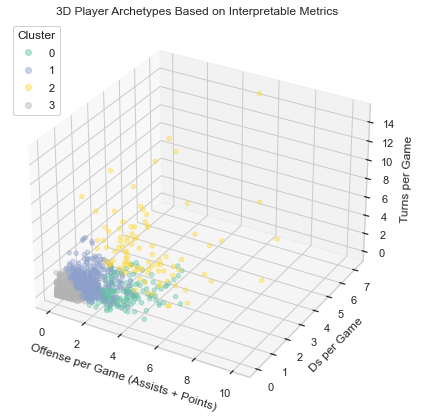

In [29]:
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection="3d")

scatter = ax.scatter(
    plot_3d_df["offense_per_game"],
    plot_3d_df["ds_per_game"],
    plot_3d_df["turns_per_game"],
    c=plot_3d_df["cluster"],
    cmap="Set2",
    alpha=0.4
)

ax.set_title("3D Player Archetypes Based on Interpretable Metrics")
ax.set_xlabel("Offense per Game (Assists + Points)")
ax.set_ylabel("Ds per Game")
ax.set_zlabel("Turns per Game")

legend = ax.legend(
    *scatter.legend_elements(),
    title="Cluster",
    loc="upper left"
)
ax.add_artist(legend)

plt.show()


The 3D visualization reveals that player impact emerges from multiple pathways rather than a single dominant metric. High offensive involvement does not necessarily imply high defensive contribution or low turnover rates, highlighting the trade-offs between usage, risk, and impact across different player archetypes.

- Cluster 0: Defensive Players
- Cluster 1: Balanced Players
- Cluster 2: High-Risk Offensive Players (contribute the extreme values in turns)
- Cluster 3: Low-Usage Role Players